In [1]:
#importing all the required libraries
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.feature_extraction.text import CountVectorizer

C:\ProgramData\Anaconda3\Anaconda full\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('C:\\Users\\SVCS\\Desktop\\deceptive-opinion.csv')

In [3]:
df.head()

,deceptive,hotel,polarity,source,text
0,truthful,conrad,positive,TripAdvisor,We stayed for a one night getaway with family ...
1,truthful,hyatt,positive,TripAdvisor,Triple A rate with upgrade to view room was le...
2,truthful,hyatt,positive,TripAdvisor,This comes a little late as I'm finally catchi...
3,truthful,omni,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...
4,truthful,hyatt,positive,TripAdvisor,I asked for a high floor away from the elevato...


In [4]:
df.tail()

,deceptive,hotel,polarity,source,text
1595,deceptive,intercontinental,negative,MTurk,Problems started when I booked the InterContin...
1596,deceptive,amalfi,negative,MTurk,The Amalfi Hotel has a beautiful website and i...
1597,deceptive,intercontinental,negative,MTurk,The Intercontinental Chicago Magnificent Mile ...
1598,deceptive,palmer,negative,MTurk,"The Palmer House Hilton, while it looks good i..."
1599,deceptive,amalfi,negative,MTurk,"As a former Chicagoan, I'm appalled at the Ama..."


In [5]:
#Extracting only the requireed features
df1 = df[['deceptive', 'text']]
df1

,deceptive,text
0,truthful,We stayed for a one night getaway with family ...
1,truthful,Triple A rate with upgrade to view room was le...
2,truthful,This comes a little late as I'm finally catchi...
3,truthful,The Omni Chicago really delivers on all fronts...
4,truthful,I asked for a high floor away from the elevato...
...,...,...
1595,deceptive,Problems started when I booked the InterContin...
1596,deceptive,The Amalfi Hotel has a beautiful website and i...
1597,deceptive,The Intercontinental Chicago Magnificent Mile ...
1598,deceptive,"The Palmer House Hilton, while it looks good i..."


In [6]:
df.describe()

,deceptive,hotel,polarity,source,text
count,1600,1600,1600,1600,1600
unique,2,20,2,3,1596
top,truthful,conrad,positive,MTurk,The Omni was chosen for it's location whichwor...
freq,800,80,800,800,2


In [7]:
#filling the categorical variable deceptive with 0 for fake review and 1 for real review
df1.loc[df1['deceptive'] == 'deceptive', 'deceptive'] = 0
df1.loc[df1['deceptive'] == 'truthful', 'deceptive'] = 1

C:\ProgramData\Anaconda3\Anaconda full\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\ProgramData\Anaconda3\Anaconda full\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [8]:
#Printing Dataframe1
df1

,deceptive,text
0,1,We stayed for a one night getaway with family ...
1,1,Triple A rate with upgrade to view room was le...
2,1,This comes a little late as I'm finally catchi...
3,1,The Omni Chicago really delivers on all fronts...
4,1,I asked for a high floor away from the elevato...
...,...,...
1595,0,Problems started when I booked the InterContin...
1596,0,The Amalfi Hotel has a beautiful website and i...
1597,0,The Intercontinental Chicago Magnificent Mile ...
1598,0,"The Palmer House Hilton, while it looks good i..."


In [9]:
#Taking the input and output features seperately
X = df1['text']
Y = np.asarray(df1['deceptive'], dtype = int)

In [10]:
#importing MultinomialNB
from sklearn.naive_bayes import MultinomialNB, GaussianNB

In [11]:
#splitting the data into training and testing set  with test size is 30%
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=109) # 70% training and 30% test

In [12]:
X_test

1063    We stayed at the Ritz Carlton two weeks prior,...
21      We went to Chicago to see an exhibit at the Ar...
1480    I recently stayed in The James Hotel in Chicag...
1215    Hyatt Regency Hotel: Good ole Downtown, Chicag...
459     Me and my husband got married here. We loved t...
                              ...                        
133     Perfect location, clean and courteous staff al...
1252    If you want a 5-star hotel with 1-star service...
254     We had our hotel reservations at another hotel...
386     We became an Ambassador member just before spe...
1240    My experience as Fairmont Chicago Millennium P...
Name: text, Length: 480, dtype: object

In [13]:
y_test

array([1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,

In [14]:
nb = MultinomialNB()

In [15]:
#Converting the review (text feature) to numerical features
cv = CountVectorizer()
x = cv.fit_transform(X_train)
y = cv.transform(X_test)

In [16]:
# Fitting the model
import pickle
nb.fit(x, y_train)
pickle.dump(nb,open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))

In [17]:
nb.predict(y)

array([1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,

In [18]:
# Training Accuracy
nb.score(x, y_train)

0.9714285714285714

In [19]:
# Testing Accuracy
nb.score(y, y_test)

0.85625

In [20]:
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import pickle

# Load the dataset
df = pd.read_csv('C:\\Users\\SVCS\\Desktop\\deceptive-opinion.csv')

# Select relevant columns
df1 = df[['deceptive', 'text']]

# Convert deceptive labels to binary
df1.loc[df1['deceptive'] == 'deceptive', 'deceptive'] = 0
df1.loc[df1['deceptive'] == 'truthful', 'deceptive'] = 1

# Extract features (X) and target variable (Y)
X = df1['text']
Y = np.asarray(df1['deceptive'], dtype=int)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=109) # 70% training and 30% test

# Initialize CountVectorizer
cv = CountVectorizer()

# Transform text data into numerical features
x_train = cv.fit_transform(X_train)
x_test = cv.transform(X_test)

# Initialize Multinomial Naive Bayes model
nb = MultinomialNB()

# Train the model
nb.fit(x_train, y_train)

# Save the trained model
with open('model.pkl', 'wb') as model_file:
    pickle.dump(nb, model_file)

# Load the trained model
with open('model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

# Make predictions on test data
y_pred = model.predict(x_test)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Calculate testing accuracy
accuracy = nb.score(x_test, y_test)
print("Testing Accuracy:", accuracy)


Precision: 0.8959276018099548
Recall: 0.8114754098360656
F1-score: 0.8516129032258064
Testing Accuracy: 0.85625


C:\ProgramData\Anaconda3\Anaconda full\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\ProgramData\Anaconda3\Anaconda full\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [ ]:
# Implementing with pywedge
!pip install pywedge
import pywedge as pw 

In [ ]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

In [ ]:
#Train the model using the training sets
clf.fit(x, y_train)


In [ ]:
#Predict the response for test dataset
y_pred = clf.predict(y)
y_pred

In [ ]:
clf.score(x, y_train) #Training accuracy

In [ ]:
clf.score(y, y_test)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn import svm
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Assuming X, Y are defined and contain the appropriate data

# Load the dataset
df = pd.read_csv('C:\\Users\\SVCS\\Desktop\\deceptive-opinion.csv')

# Select relevant columns
df1 = df[['deceptive', 'text']]

# Convert deceptive labels to binary
df1.loc[df1['deceptive'] == 'deceptive', 'deceptive'] = 0
df1.loc[df1['deceptive'] == 'truthful', 'deceptive'] = 1

# Extract features (X) and target variable (Y)
X = df1['text']
Y = np.asarray(df1['deceptive'], dtype=int)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=109) # 70% training and 30% test

# Initialize CountVectorizer
cv = CountVectorizer()

# Transform text data into numerical features
x_train = cv.fit_transform(X_train)
x_test = cv.transform(X_test)

# Create an SVM classifier with linear kernel
clf = svm.SVC(kernel='linear')

# Train the model using the training sets
clf.fit(x_train, y_train)

# Predict the response for the test dataset
y_pred = clf.predict(x_test)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Training Accuracy
training_accuracy = clf.score(x_train, y_train)
print("Training Accuracy:", training_accuracy)

# Testing Accuracy
testing_accuracy = clf.score(x_test, y_test)
print("Testing Accuracy:", testing_accuracy)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier()

# Train the Random Forest model
rf_model.fit(x_train, y_train)

# Save the trained Random Forest model
with open('rf_model.pkl', 'wb') as model_file:
    pickle.dump(rf_model, model_file)

# Load the trained Random Forest model
with open('rf_model.pkl', 'rb') as model_file:
    rf_model_loaded = pickle.load(model_file)

# Make predictions on test data using Random Forest model
y_pred_rf = rf_model_loaded.predict(x_test)

# Calculate precision, recall, and F1-score for Random Forest model
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print("Random Forest Precision:", precision_rf)
print("Random Forest Recall:", recall_rf)
print("Random Forest F1-score:", f1_rf)

# Calculate testing accuracy for Random Forest model
accuracy_rf = rf_model_loaded.score(x_test, y_test)
print("Random Forest Testing Accuracy:", accuracy_rf)


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize Gradient Boosting Classifier
gb_model = GradientBoostingClassifier()

# Train the Gradient Boosting model
gb_model.fit(x_train, y_train)

# Save the trained Gradient Boosting model
with open('gb_model.pkl', 'wb') as model_file:
    pickle.dump(gb_model, model_file)

# Load the trained Gradient Boosting model
with open('gb_model.pkl', 'rb') as model_file:
    gb_model_loaded = pickle.load(model_file)

# Make predictions on test data using Gradient Boosting model
y_pred_gb = gb_model_loaded.predict(x_test)

# Calculate precision, recall, and F1-score for Gradient Boosting model
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)

print("Gradient Boosting Precision:", precision_gb)
print("Gradient Boosting Recall:", recall_gb)
print("Gradient Boosting F1-score:", f1_gb)

# Calculate testing accuracy for Gradient Boosting model
accuracy_gb = gb_model_loaded.score(x_test, y_test)
print("Gradient Boosting Testing Accuracy:", accuracy_gb)


In [22]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression Classifier
logreg_model = LogisticRegression()

# Train the Logistic Regression model
logreg_model.fit(x_train, y_train)

# Save the trained Logistic Regression model
with open('logreg_model.pkl', 'wb') as model_file:
    pickle.dump(logreg_model, model_file)

# Load the trained Logistic Regression model
with open('logreg_model.pkl', 'rb') as model_file:
    logreg_model_loaded = pickle.load(model_file)

# Make predictions on test data using Logistic Regression model
y_pred_logreg = logreg_model_loaded.predict(x_test)

# Calculate precision, recall, and F1-score for Logistic Regression model
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)

print("Logistic Regression Precision:", precision_logreg)
print("Logistic Regression Recall:", recall_logreg)
print("Logistic Regression F1-score:", f1_logreg)

# Calculate testing accuracy for Logistic Regression model
accuracy_logreg = logreg_model_loaded.score(x_test, y_test)
print("Logistic Regression Testing Accuracy:", accuracy_logreg)


Logistic Regression Precision: 0.8601694915254238
Logistic Regression Recall: 0.8319672131147541
Logistic Regression F1-score: 0.8458333333333333
Logistic Regression Testing Accuracy: 0.8458333333333333


C:\ProgramData\Anaconda3\Anaconda full\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Accuracy values for each algorithm
algorithms = ['Multinomial NB', 'SVM', 'Random Forest', 'Gradient Boosting', 'Logistic Regression']
accuracies = []

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier()

# Train the Random Forest model
rf_model.fit(x_train, y_train)

# Load the trained Random Forest model
with open('rf_model.pkl', 'rb') as model_file:
    rf_model_loaded = pickle.load(model_file)

# Calculate and store accuracy for Multinomial Naive Bayes
y_pred_nb = nb.predict(x_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
accuracies.append(accuracy_nb)

# Calculate and store accuracy for SVM
y_pred_svm = svm.predict(x_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracies.append(accuracy_svm)

# Calculate and store accuracy for Random Forest
y_pred_rf = rf_model_loaded.predict(x_test)  # Corrected model variable name
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracies.append(accuracy_rf)

# Calculate and store accuracy for Gradient Boosting
y_pred_gb = gb_model_loaded.predict(x_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
accuracies.append(accuracy_gb)

# Calculate and store accuracy for Logistic Regression
y_pred_logreg = logreg_model_loaded.predict(x_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
accuracies.append(accuracy_logreg)

# Plotting accuracy
plt.figure(figsize=(10, 6))
plt.bar(algorithms, accuracies, color='skyblue')
plt.xlabel('Algorithms')
plt.ylabel('Testing Accuracy')
plt.title('Accuracy Comparison of Algorithms')
plt.ylim(0.7, 1)  # Set y-axis limit for better visualization
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

plt.show()


NameError: name 'gb_model_loaded' is not defined

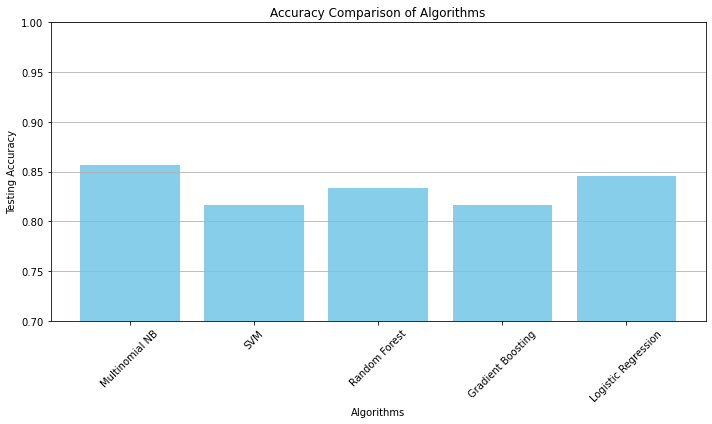

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

# Accuracy values for each algorithm
algorithms = ['Multinomial NB', 'SVM', 'Random Forest', 'Gradient Boosting', 'Logistic Regression']
accuracies = []

# Initialize Gradient Boosting Classifier
gb_model = GradientBoostingClassifier()

# Train the Gradient Boosting model
gb_model.fit(x_train, y_train)

# Load the trained Gradient Boosting model
with open('gb_model.pkl', 'rb') as model_file:
    gb_model_loaded = pickle.load(model_file)

# Calculate and store accuracy for Multinomial Naive Bayes
y_pred_nb = nb.predict(x_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
accuracies.append(accuracy_nb)

# Calculate and store accuracy for SVM
y_pred_svm = svm.predict(x_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracies.append(accuracy_svm)

# Calculate and store accuracy for Random Forest
y_pred_rf = rf_model_loaded.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracies.append(accuracy_rf)

# Calculate and store accuracy for Gradient Boosting
y_pred_gb = gb_model_loaded.predict(x_test)  # Corrected model variable name
accuracy_gb = accuracy_score(y_test, y_pred_gb)
accuracies.append(accuracy_gb)

# Calculate and store accuracy for Logistic Regression
y_pred_logreg = logreg_model_loaded.predict(x_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
accuracies.append(accuracy_logreg)

# Plotting accuracy
plt.figure(figsize=(10, 6))
plt.bar(algorithms, accuracies, color='skyblue')
plt.xlabel('Algorithms')
plt.ylabel('Testing Accuracy')
plt.title('Accuracy Comparison of Algorithms')
plt.ylim(0.7, 1)  # Set y-axis limit for better visualization
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

plt.show()


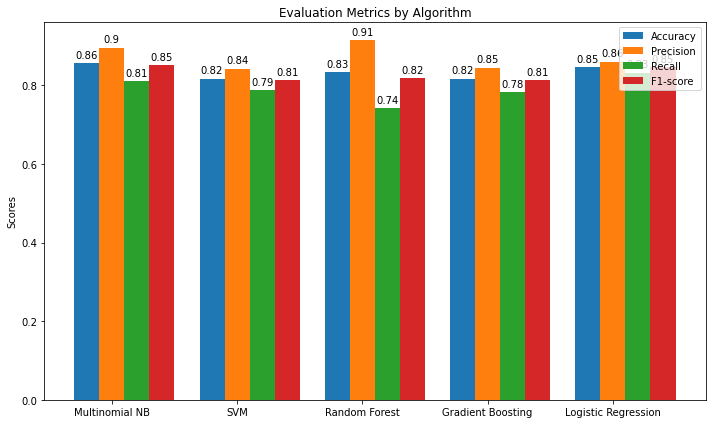

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# Evaluation metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']

# Algorithms
algorithms = ['Multinomial NB', 'SVM', 'Random Forest', 'Gradient Boosting', 'Logistic Regression']

# Accuracy values
accuracy_values = [accuracy_nb, accuracy_svm, accuracy_rf, accuracy_gb, accuracy_logreg]

# Precision values
precision_values = [
    precision_score(y_test, y_pred_nb),
    precision_score(y_test, y_pred_svm),
    precision_score(y_test, y_pred_rf),
    precision_score(y_test, y_pred_gb),
    precision_score(y_test, y_pred_logreg)
]

# Recall values
recall_values = [
    recall_score(y_test, y_pred_nb),
    recall_score(y_test, y_pred_svm),
    recall_score(y_test, y_pred_rf),
    recall_score(y_test, y_pred_gb),
    recall_score(y_test, y_pred_logreg)
]

# F1-score values
f1_values = [
    f1_score(y_test, y_pred_nb),
    f1_score(y_test, y_pred_svm),
    f1_score(y_test, y_pred_rf),
    f1_score(y_test, y_pred_gb),
    f1_score(y_test, y_pred_logreg)
]

x = np.arange(len(algorithms))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, accuracy_values, width, label='Accuracy')
rects2 = ax.bar(x, precision_values, width, label='Precision')
rects3 = ax.bar(x + width, recall_values, width, label='Recall')
rects4 = ax.bar(x + 2*width, f1_values, width, label='F1-score')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Evaluation Metrics by Algorithm')
ax.set_xticks(x)
ax.set_xticklabels(algorithms)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()

plt.show()
